In [1]:
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join


Using TensorFlow backend.


In [14]:
img_h=150
img_w=150
traindata='E:/train_catvsdog/train'
testdata='E:/train_catvsdog'
valdata='E:/train_catvsdog/validation'
train_sample= 120
val_sample=30
epoches = 5
batch_size= 30
if K.image_data_format()=='channels_first':
    input_shape= (3,img_w,img_h)
else:
    input_shape= (img_w,img_h,3)

In [15]:
model =Sequential()
model.add(Conv2D(32,(3,3) ,input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
    
     

In [16]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',
                 optimizer=keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])


In [17]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [18]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [19]:
train_generator= train_datagen.flow_from_directory(traindata,target_size=(img_w,img_h),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 120 images belonging to 2 classes.


In [20]:
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [21]:
imgs,labels= next(train_generator)

In [22]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)

30
0.0


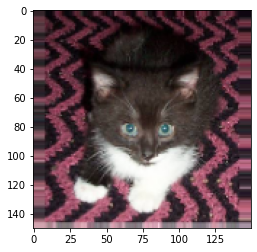

1.0


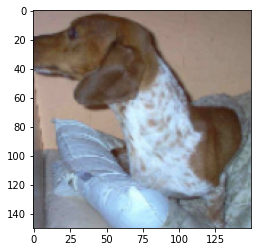

1.0


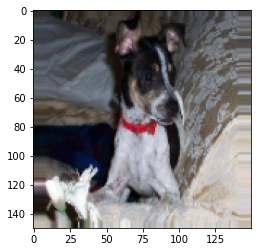

1.0


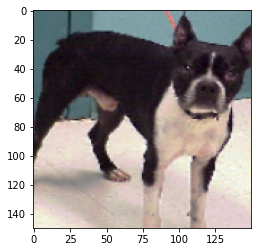

1.0


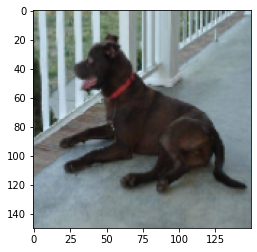

0.0


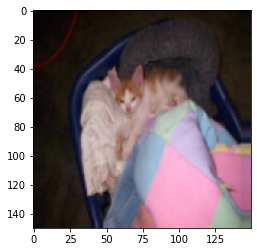

1.0


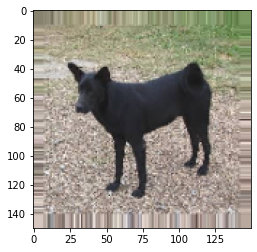

1.0


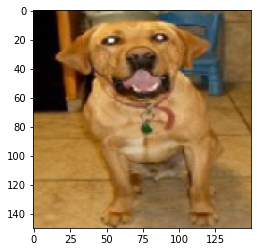

1.0


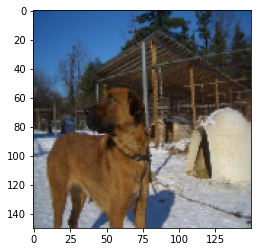

1.0


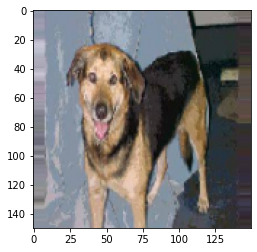

0.0


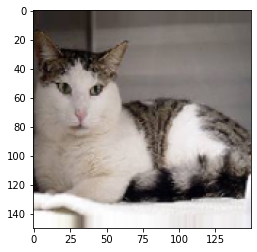

0.0


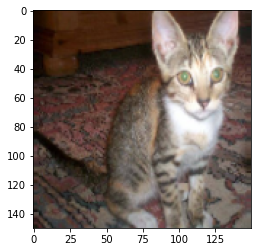

1.0


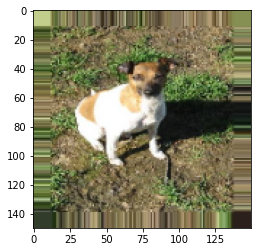

1.0


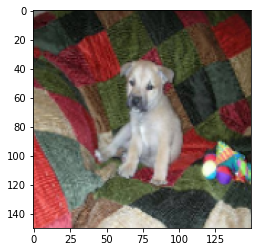

1.0


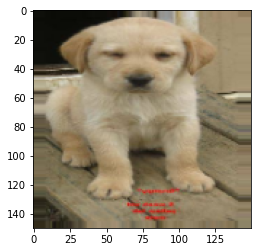

1.0


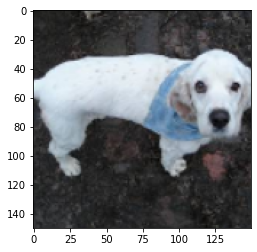

0.0


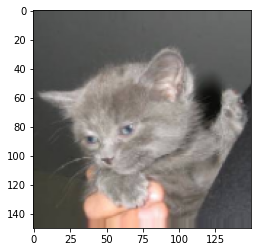

0.0


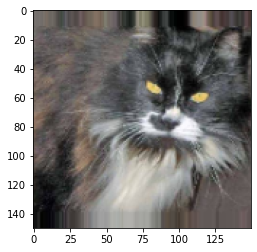

1.0


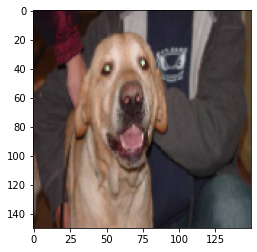

1.0


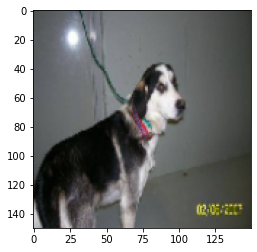

0.0


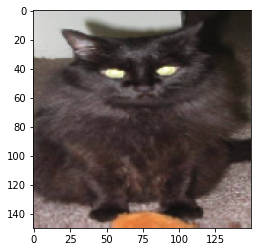

1.0


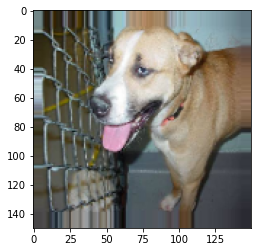

1.0


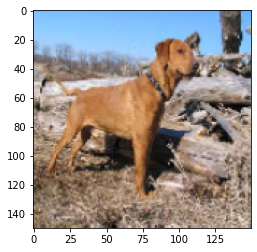

1.0


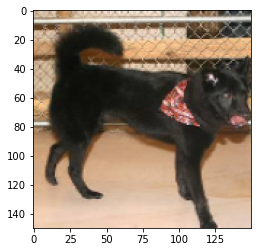

1.0


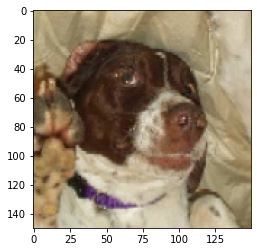

0.0


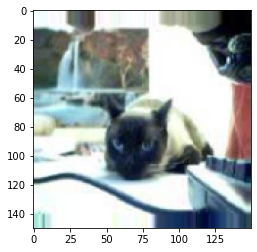

0.0


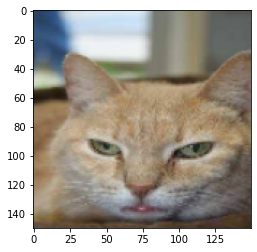

1.0


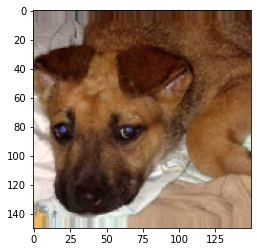

1.0


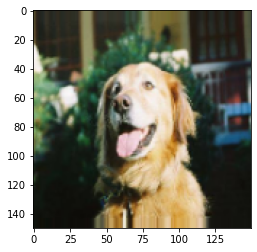

0.0


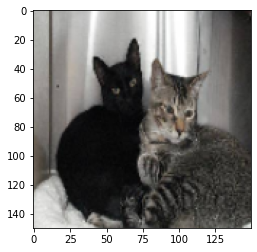

In [23]:
import matplotlib.pyplot as plt
import cv2
image_batch,label_batch= train_generator.next()
print(len(image_batch))
for i in range(0,len(image_batch)):
    plt.imshow(image_batch[i])
    print(label_batch[i])
    plt.show()
    


In [24]:
validation_generator= test_datagen.flow_from_directory(
    valdata,
target_size=(img_w,img_h),
batch_size=batch_size,
class_mode='binary')

Found 95 images belonging to 2 classes.


In [31]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=train_sample,
                             epochs=epoches,
                             validation_data=validation_generator,
                             validation_steps=val_sample)

Epoch 1/5
120/120 [==============================] - 78s 647ms/step - loss: 0.6400 - acc: 0.6250 - val_loss: 0.6792 - val_acc: 0.5917
Epoch 2/5
120/120 [==============================] - 77s 638ms/step - loss: 0.5142 - acc: 0.7728 - val_loss: 0.6955 - val_acc: 0.6634
Epoch 3/5
120/120 [==============================] - 77s 638ms/step - loss: 0.4081 - acc: 0.8328 - val_loss: 0.7820 - val_acc: 0.6814
Epoch 4/5
120/120 [==============================] - 78s 649ms/step - loss: 0.3170 - acc: 0.8767 - val_loss: 0.8885 - val_acc: 0.6428
Epoch 5/5
120/120 [==============================] - 77s 645ms/step - loss: 0.2475 - acc: 0.9114 - val_loss: 1.0311 - val_acc: 0.6290


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


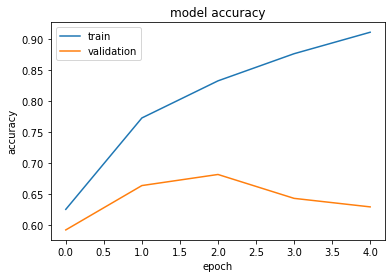

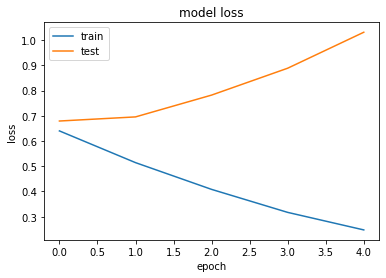

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
## Now Predict
predict_dir_path='E:/train_catvsdog/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '8.jpg', '9.jpg']


In [60]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_w, img_h))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

11.jpg: cat
12.jpg: dog
13.jpg: dog
14.jpg: dog
15.jpg: dog
16.jpg: dog
17.jpg: dog
18.jpg: dog
19.jpg: dog
2.jpg: dog
20.jpg: dog
21.jpg: dog
22.jpg: cat
23.jpg: dog
24.jpg: dog
25.jpg: dog
26.jpg: dog
27.jpg: cat
28.jpg: cat
29.jpg: dog
3.jpg: cat
30.jpg: cat
31.jpg: dog
32.jpg: dog
33.jpg: dog
34.jpg: dog
35.jpg: dog
36.jpg: cat
37.jpg: dog
38.jpg: dog
39.jpg: dog
4.jpg: dog
40.jpg: dog
41.jpg: cat
42.jpg: dog
43.jpg: dog
44.jpg: dog
45.jpg: dog
46.jpg: dog
47.jpg: cat
48.jpg: cat
49.jpg: cat
5.jpg: dog
50.jpg: dog
51.jpg: dog
52.jpg: cat
53.jpg: dog
54.jpg: dog
55.jpg: dog
56.jpg: dog
57.jpg: dog
58.jpg: cat
59.jpg: dog
6.jpg: dog
60.jpg: dog
61.jpg: cat
62.jpg: dog
63.jpg: dog
64.jpg: dog
65.jpg: dog
66.jpg: dog
67.jpg: dog
68.jpg: dog
69.jpg: dog
7.jpg: dog
70.jpg: dog
71.jpg: dog
72.jpg: dog
73.jpg: dog
74.jpg: dog
8.jpg: dog
9.jpg: cat
Total Dogs : 57
Total Cats : 15
